# <font color ='gold'><font size=6>**_Análise Exploratória: Preços dos Combustíveis no Brasil (Maio-Junho/2023)_** </font>

## **<font color ='gold'><font size=5>1. Descrição e Objetivo do Projeto</font>** 

### Espaço para texto 

## **<font color ='gold'><font size=5>2. Coleta e análise dos dados</font>** 

**Primeiramente, para podermos iniciar nossos trabalhos, iremos coletar nossos dados e ter nosso primeiro contato com eles, compreendendo suas características que o definem e sua estrutura.**


- **Importação das bibliotecas que serão utilizadas** 

In [1]:
import pandas as pd

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


- **Agora que já importamos todas as bibliotecas, Vamos coletar nossos dados através dos arquivos csv que estão hospedados no domínio da <font color ='red'>**ANP**</font> e juntá-los num dataframe chamado <font color ='9E36CE'>**Combustiveis**</font>**

In [71]:
# Importando os dados de Maio
combustiveis_maio = pd.read_csv("https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2023/precos-gasolina-etanol-05.csv", sep=(";"))
# Importando os dados de Junho
combustiveis_junho = pd.read_csv("https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2023/precos-gasolina-etanol-06.csv", sep=(";"))

# Concatenando os dados
combustiveis = pd.concat([combustiveis_maio, combustiveis_junho,], ignore_index=True)


- **Vamos usar o comando <font color='9E36CE'>**combustiveis.shape**</font> para saber a dimensão do nosso dataframe**

In [73]:
combustiveis.shape

(107531, 16)

Com essa checagem, podemos verificar que nosso DataSet contém **_107531_** linhas/registros por **_16_** colunas/variáveis.

## **<font color ='gold' size=5>3. Tratamento do Dados</font>**

###  **<font color ='white' size=5>3.1. Vamos verificar a porcentagem de dados ausentes em cada coluna.</font>**

In [4]:

(((combustiveis.isnull().sum() / combustiveis.shape[0]) * 100).sort_values(ascending=False)).round(4)

Valor de Compra      100.0000
Complemento           77.8222
Bairro                 0.2102
Numero Rua             0.0418
Regiao - Sigla         0.0000
Estado - Sigla         0.0000
Municipio              0.0000
Revenda                0.0000
CNPJ da Revenda        0.0000
Nome da Rua            0.0000
Cep                    0.0000
Produto                0.0000
Data da Coleta         0.0000
Valor de Venda         0.0000
Unidade de Medida      0.0000
Bandeira               0.0000
dtype: float64

Podemos reparar que duas colunas se sobressaem, sendo elas a coluna de `Valor de Compra` que possui **_100% dos seus valores nulos_**, e a coluna `Complemento` que possui cerca de **_77% de seus valores nulos._**

A partir disso, precisamos abordar certas mudanças em algumas das colunas durante o processo de limpeza do DataSet. Sendo elas:

- Resetar o index do DataFrame concatenado;

- Retirar a coluna `Valor de Compra`, pois a mesma é composta apenas por **_valores NaN;_**
- Alterar o Dtype da coluna `Valor de Venda` de **_str_** para **_float64_**, para podermos realizar operações e análises a partir dela;
- Retirar a coluna `Complemento`, pois não usaremos para nossa análise.
- Alterar o Dtype da coluna `Data da Coleta` de str para DateTime, para podermos realizar filtragens e pesquisas a partir das datas;


Com esse tratamento dos dados, poderemos aprofundar mais nossa análise exploratória e compreender ainda melhor o nosso DataSet.

### **<font color ='white' size=5>3.2. Tratamento dos dados</font>**



- Resetando o Index no DataFrame concatenado:

In [74]:
combustiveis.reset_index(0,drop=True,inplace = True)

- Retirar a coluna valor de compra, pois tem 100% dos valores nulos,preencher a coluna complemento com 0 e mudar o tipo da coluna valor de venda de object para float64

In [75]:
combustiveis.drop('Valor de Compra',axis=1,inplace=True)

- Transformando valores da Coluna 'Valor de Venda' para float64

In [76]:
combustiveis['Valor de Venda'] = combustiveis['Valor de Venda'].str.replace(',', '.').astype(float)

- Removendo a coluna "Complemento"

In [77]:
combustiveis.drop('Complemento', axis=1, inplace=True)

- Alterando o tipo de dado da coluna 'Data da Coleta' para datetime

In [78]:
combustiveis['Data da Coleta'] = pd.to_datetime(combustiveis['Data da Coleta'], dayfirst=True)

- Após realizarmos a limpeza e tratamento dos dados vamos conferir como está  nosso dataframe

In [79]:
combustiveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107531 entries, 0 to 107530
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Regiao - Sigla     107531 non-null  object        
 1   Estado - Sigla     107531 non-null  object        
 2   Municipio          107531 non-null  object        
 3   Revenda            107531 non-null  object        
 4   CNPJ da Revenda    107531 non-null  object        
 5   Nome da Rua        107531 non-null  object        
 6   Numero Rua         107486 non-null  object        
 7   Bairro             107305 non-null  object        
 8   Cep                107531 non-null  object        
 9   Produto            107531 non-null  object        
 10  Data da Coleta     107531 non-null  datetime64[ns]
 11  Valor de Venda     107531 non-null  float64       
 12  Unidade de Medida  107531 non-null  object        
 13  Bandeira           107531 non-null  object  

Como podemos ver, nossas mudanças foram realizadas com sucesso, agora temos os tipos de dados corretos para as colunas apropriadas.

Vamos visualizar os 5 registros iniciais do DataFrame:

In [80]:
combustiveis.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
0,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,JARDIM ZULMIRA,18061-000,ETANOL,2023-05-01,3.79,R$ / litro,BRANCA
1,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,JARDIM ZULMIRA,18061-000,GASOLINA,2023-05-01,4.69,R$ / litro,BRANCA
2,N,AC,CRUZEIRO DO SUL,AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.492.748/0003-83,AVENIDA COPACABANA,440,COPACABANA,69980-000,ETANOL,2023-05-01,5.49,R$ / litro,IPIRANGA
3,N,AC,CRUZEIRO DO SUL,AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.492.748/0003-83,AVENIDA COPACABANA,440,COPACABANA,69980-000,GASOLINA ADITIVADA,2023-05-01,6.97,R$ / litro,IPIRANGA
4,N,AC,CRUZEIRO DO SUL,AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.492.748/0003-83,AVENIDA COPACABANA,440,COPACABANA,69980-000,GASOLINA,2023-05-01,6.97,R$ / litro,IPIRANGA


### **<font color ='white' size=5>3.3 Checando outliers.</font>**

#### <font color ='white' size=5>**3.3.1 Resumo estatístico dos valores com o método describe**</font>

In [19]:
combustiveis['Valor de Venda'].describe().round(3)

count    107531.000
mean          5.030
std           0.764
min           2.970
25%           4.490
50%           5.240
75%           5.590
max           7.990
Name: Valor de Venda, dtype: float64

#### <font color ='white' size=5>**3.3.2 Separando o dataframe principal em dataframes por mês**</font>

In [20]:
combustiveis['Data da Coleta'] = pd.to_datetime(combustiveis['Data da Coleta'], format='%d/%m/%Y')


# Filtrar as datas para o mês de maio
maio = combustiveis[combustiveis['Data da Coleta'].dt.month == 5]
# Filtrar as datas para o mês de junho
junho = combustiveis[combustiveis['Data da Coleta'].dt.month == 6]


#### <font color ='white' size=5>**3.3.3 Criando dataframes específicos para cada combustível**</font>

- **Etanol**

In [93]:
etanol = combustiveis[(combustiveis['Produto'] == 'ETANOL') ]

etanol

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
0,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,JARDIM ZULMIRA,18061-000,ETANOL,2023-05-01,3.79,R$ / litro,BRANCA
2,N,AC,CRUZEIRO DO SUL,AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.492.748/0003-83,AVENIDA COPACABANA,440,COPACABANA,69980-000,ETANOL,2023-05-01,5.49,R$ / litro,IPIRANGA
5,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL 220 - KM 06,S/N,PLANALTO,57308-000,ETANOL,2023-05-01,4.58,R$ / litro,VIBRA ENERGIA
9,NE,AL,ARAPIRACA,IBN PINTO E SILVA & CIA LTDA,01.242.690/0001-58,RODOVIA AL-110,678,CANAFISTULA,57302-802,ETANOL,2023-05-01,4.29,R$ / litro,IPIRANGA
12,NE,AL,ARAPIRACA,IBN PINTO E SILVA & CIA LTDA,01.242.690/0002-39,"AVENIDA EMIDIO DE LIMA,",23,JARDIM ESPERANCA,57304-820,ETANOL,2023-05-01,4.69,R$ / litro,IPIRANGA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107517,CO,GO,GOIANIA,AUTO POSTO SANTA LUZIA LTDA,04.142.631/0002-87,AVENIDA JOSE INACIO SOBRINHO,731,SETOR MARABA,74465-524,ETANOL,2023-06-30,3.94,R$ / litro,IPIRANGA
107520,SE,RJ,ITAGUAI,POSTO DE GASOLINA CIDADE DO PORTO LTDA,10.317.382/0001-35,RODOVIA RIO SANTOS,S/N,IBIRAPITANGA,23815-550,ETANOL,2023-06-30,4.39,R$ / litro,RAIZEN
107522,SE,SP,ITAPOLIS,AROEIRA AUTO POSTO EIRELI,24.577.972/0001-01,AVENIDA FREI PAULO LUIG,861,CENTRO,14900-000,ETANOL,2023-06-30,3.59,R$ / litro,BRANCA
107524,NE,BA,CAMACARI,POSTO DE COMBUSTIVEIS BUSCA VIDA LTDA,28.315.993/0001-00,RUA C,27,VILA DE ABRANTES,42840-000,ETANOL,2023-06-30,4.44,R$ / litro,BRANCA


- **Gasolina**

In [91]:
gasolina = combustiveis[(combustiveis['Produto'] == 'GASOLINA') ]
gasolina

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
1,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,JARDIM ZULMIRA,18061-000,GASOLINA,2023-05-01,4.69,R$ / litro,BRANCA
4,N,AC,CRUZEIRO DO SUL,AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.492.748/0003-83,AVENIDA COPACABANA,440,COPACABANA,69980-000,GASOLINA,2023-05-01,6.97,R$ / litro,IPIRANGA
7,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL 220 - KM 06,S/N,PLANALTO,57308-000,GASOLINA,2023-05-01,5.89,R$ / litro,VIBRA ENERGIA
8,NE,AL,ARAPIRACA,AUTO POSTO SAO FRANCISCO LTDA,12.706.529/0001-04,RUA SAO FRANCISCO,274,CENTRO,57300-080,GASOLINA,2023-05-01,5.77,R$ / litro,VIBRA ENERGIA
11,NE,AL,ARAPIRACA,IBN PINTO E SILVA & CIA LTDA,01.242.690/0001-58,RODOVIA AL-110,678,CANAFISTULA,57302-802,GASOLINA,2023-05-01,5.74,R$ / litro,IPIRANGA


- **Gasolina Aditivada**

In [92]:
gasolina_adtivada = combustiveis[(combustiveis['Produto'] == 'GASOLINA ADITIVADA') ]
gasolina_adtivada

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
3,N,AC,CRUZEIRO DO SUL,AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.492.748/0003-83,AVENIDA COPACABANA,440,COPACABANA,69980-000,GASOLINA ADITIVADA,2023-05-01,6.97,R$ / litro,IPIRANGA
6,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL 220 - KM 06,S/N,PLANALTO,57308-000,GASOLINA ADITIVADA,2023-05-01,5.89,R$ / litro,VIBRA ENERGIA
10,NE,AL,ARAPIRACA,IBN PINTO E SILVA & CIA LTDA,01.242.690/0001-58,RODOVIA AL-110,678,CANAFISTULA,57302-802,GASOLINA ADITIVADA,2023-05-01,5.94,R$ / litro,IPIRANGA
13,NE,AL,ARAPIRACA,IBN PINTO E SILVA & CIA LTDA,01.242.690/0002-39,"AVENIDA EMIDIO DE LIMA,",23,JARDIM ESPERANCA,57304-820,GASOLINA ADITIVADA,2023-05-01,5.94,R$ / litro,IPIRANGA
16,NE,AL,DELMIRO GOUVEIA,AUTO POSTO FREITAS & MAIA LTDA,12.436.978/0001-80,RUA FLORIANO PEIXOTO,247,CENTRO,57480-000,GASOLINA ADITIVADA,2023-05-01,6.69,R$ / litro,VIBRA ENERGIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107512,NE,CE,ITAPIPOCA,DISTRIBUIDORA DE DERIVADOS DE PETROLEO AMONTAD...,13.783.012/0001-81,RODOVIA CE 354,S/N,DESERTO,62502-974,GASOLINA ADITIVADA,2023-06-30,5.92,R$ / litro,SP
107515,SE,SP,ITAPOLIS,AUTO POSTO E CONVENIENCIA BHX LTDA,04.464.161/0001-97,RUA JOSE ROSSI,685,CENTRO,14900-000,GASOLINA ADITIVADA,2023-06-30,5.39,R$ / litro,BRANCA
107518,CO,GO,GOIANIA,AUTO POSTO SANTA LUZIA LTDA,04.142.631/0002-87,AVENIDA JOSE INACIO SOBRINHO,731,SETOR MARABA,74465-524,GASOLINA ADITIVADA,2023-06-30,5.64,R$ / litro,IPIRANGA
107525,NE,BA,CAMACARI,POSTO DE COMBUSTIVEIS BUSCA VIDA LTDA,28.315.993/0001-00,RUA C,27,VILA DE ABRANTES,42840-000,GASOLINA ADITIVADA,2023-06-30,5.64,R$ / litro,BRANCA



### <font color ='white' size=5>**3.4 Calculo do limites de outlier**</font>

#### <font color ='white' size=5>**3.4.1 Definindo um range para os outliers utilizando a Regra 1.5 IQR (Interquartile Range): Valores que estão abaixo de Q1 - 1.5 * IQR ou acima de Q3 + 1.5 * IQR, onde Q1 é o primeiro quartil e Q3 é o terceiro quartil.**</font>


In [37]:
# Definindo os quartis para o etanol
primeiro_quartil_etanol = etanol['Valor de Venda'].describe().loc['25%']
terceiro_quartil_etanol = etanol['Valor de Venda'].describe().loc['75%']


# Definindo os quartis para a gasolina
primeiro_quartil_gasolina = gasolina['Valor de Venda'].describe().loc['25%']
terceiro_quartil_gasolina = gasolina['Valor de Venda'].describe().loc['75%']

# Definindo os quartis para o gasolina aditivada
primeiro_quartil_aditivada = gasolina_adtivada['Valor de Venda'].describe().loc['25%']
terceiro_quartil_aditivada = gasolina_adtivada['Valor de Venda'].describe().loc['75%']

dados = {
    'Combustível': ['Etanol', 'Gasolina', 'Gasolina Aditivada'],
    'Primeiro Quartil': [primeiro_quartil_etanol, primeiro_quartil_gasolina, primeiro_quartil_aditivada],
    'Terceiro Quartil': [terceiro_quartil_etanol, terceiro_quartil_gasolina, terceiro_quartil_aditivada]
}

# Criar o DataFrame
df_quartis = pd.DataFrame(dados)

df_quartis


,Combustível,Primeiro Quartil,Terceiro Quartil
0,Etanol,3.74,4.45
1,Gasolina,5.17,5.59
2,Gasolina Aditivada,5.32,5.79


#### <font color ='white' size=5>**3.4.2 Definimos os limites inferiores e superioes de outliers**

In [94]:
#Calculando o IQR e os limites para detecção de outliers

# IQR = Q3 - Q1

#Etanol
IQR_etanol = terceiro_quartil_etanol - primeiro_quartil_etanol


limite_outlier_inferior_etanol = (primeiro_quartil_etanol - (1.5 * IQR_etanol)).round(3)
limite_outlier_superior_etanol = (terceiro_quartil_etanol + (1.5 * IQR_etanol)).round(3)

#Gasolina
IQR_gasolina = terceiro_quartil_gasolina - primeiro_quartil_gasolina

limite_outlier_inferior_gasolina = (primeiro_quartil_gasolina - (1.5 * IQR_gasolina)).round(3)
limite_outlier_superior_gasolina = (terceiro_quartil_gasolina + (1.5 * IQR_gasolina)).round(3)

#Gasolina Aditivada
IQR_gasolina_aditivada = terceiro_quartil_aditivada - primeiro_quartil_aditivada

limite_outlier_inferior_aditivada = (primeiro_quartil_aditivada - (1.5 * IQR_gasolina_aditivada)).round(3)
limite_outlier_superior_aditivada = (terceiro_quartil_aditivada + (1.5 * IQR_gasolina_aditivada)).round(3)



dados = {
    'Combustível': ['Etanol', 'Gasolina', 'Gasolina Aditivada'],
    'IQR': [IQR_etanol, IQR_gasolina, IQR_gasolina_aditivada],
    'Limite Inferior': [limite_outlier_inferior_etanol, limite_outlier_inferior_gasolina, limite_outlier_inferior_aditivada],
    'Limite Superior': [limite_outlier_superior_etanol, limite_outlier_superior_gasolina, limite_outlier_superior_aditivada]
}

df_intervalos_outlier = pd.DataFrame(dados)

df_intervalos_outlier

,Combustível,IQR,Limite Inferior,Limite Superior
0,Etanol,0.71,2.675,5.515
1,Gasolina,0.42,4.540,6.220
2,Gasolina Aditivada,0.47,4.615,6.495


- **Quantidade de  outlier abaixo dos limites definidos**

In [40]:
# Etanol
outliers_abaixo_etanol = etanol['Valor de Venda'] < limite_outlier_inferior_etanol
quantidade_outliers_abaixo_etanol = outliers_abaixo_etanol.sum()


# Gasolina
outliers_abaixo_gasolina = gasolina['Valor de Venda'] < limite_outlier_inferior_gasolina
quantidade_outliers_abaixo_gasolina = outliers_abaixo_gasolina.sum()


# Gasolina Aditivada
outliers_abaixo_aditivada = gasolina_adtivada['Valor de Venda'] < limite_outlier_inferior_aditivada
quantidade_outliers_abaixo_aditivada = outliers_abaixo_aditivada.sum()

dados = {
    'Combustível': ['Etanol', 'Gasolina', 'Gasolina Aditivada'],
    'Outliers Abaixo': [quantidade_outliers_abaixo_etanol, quantidade_outliers_abaixo_gasolina, quantidade_outliers_abaixo_aditivada]
}

# Criar o DataFrame
df_quantidade_outliers = pd.DataFrame(dados)

df_quantidade_outliers

,Combustível,Outliers Abaixo
0,Etanol,0
1,Gasolina,48
2,Gasolina Aditivada,10


- **Quantidade de outlier acima dos limites definidos**

In [95]:
# Calcular a quantidade de outliers acima para o etanol
outliers_acima_etanol = etanol['Valor de Venda'] > limite_outlier_superior_etanol
quantidade_outliers_acima_etanol = outliers_acima_etanol.sum()

# Calcular a quantidade de outliers acima para a gasolina
outliers_acima_gasolina = gasolina['Valor de Venda'] > limite_outlier_superior_gasolina
quantidade_outliers_acima_gasolina = outliers_acima_gasolina.sum()

# Calcular a quantidade de outliers acima para a gasolina aditivada
outliers_acima_aditivada = gasolina_adtivada['Valor de Venda'] > limite_outlier_superior_aditivada
quantidade_outliers_acima_aditivada = outliers_acima_aditivada.sum()

# Dados
dados = {
    'Combustível': ['Etanol', 'Gasolina', 'Gasolina Aditivada'],
    'Quantidade de Outliers Acima': [quantidade_outliers_acima_etanol, quantidade_outliers_acima_gasolina, quantidade_outliers_acima_aditivada]
}

# Criar o DataFrame
df_quantidade_outliers_acima = pd.DataFrame(dados)

df_quantidade_outliers_acima

,Combustível,Quantidade de Outliers Acima
0,Etanol,146
1,Gasolina,841
2,Gasolina Aditivada,514


- Podemos perceber que temos poucos valores abaixo dos limites, em contrapartida temos varios registros acima dos limites, Vamos calcular a porcentagem que esses valores representam para o dataframe 

In [60]:
# Porcentagem de outliers acima e abaixo da média para cada combustível

# Etanol
porcentagem_acima_etanol = (quantidade_outliers_acima_etanol / len(etanol)) * 100
porcentagem_abaixo_etanol = (quantidade_outliers_abaixo_etanol / len(etanol)) * 100

# Gasolina
porcentagem_acima_gasolina = (quantidade_outliers_acima_gasolina / len(gasolina)) * 100
porcentagem_abaixo_gasolina = (quantidade_outliers_abaixo_gasolina / len(gasolina)) * 100

# Gasolina Aditivada
porcentagem_acima_aditivada = (quantidade_outliers_acima_aditivada / len(gasolina_adtivada)) * 100
porcentagem_abaixo_aditivada = (quantidade_outliers_abaixo_aditivada / len(gasolina_adtivada)) * 100

# Dados
dados = {
    'Combustível': ['Etanol', 'Gasolina', 'Gasolina Aditivada'],
    'Porcentagem de Outliers Acima (%)': [porcentagem_acima_etanol, porcentagem_acima_gasolina, porcentagem_acima_aditivada],
    'Porcentagem de Outliers Abaixo (%)': [porcentagem_abaixo_etanol, porcentagem_abaixo_gasolina, porcentagem_abaixo_aditivada]
}

# Criar o DataFrame
df_porcentagem_outliers = pd.DataFrame(dados)

df_porcentagem_outliers.round(2)

,Combustível,Porcentagem de Outliers Acima (%),Porcentagem de Outliers Abaixo (%)
0,Etanol,0.42,0.00
1,Gasolina,2.05,0.12
2,Gasolina Aditivada,1.62,0.03


- **Os outliers representam pequenas porcentagens quando comparados aos seus dataframes, Vamos calcular a interferência que esse valores causam nos nosso dados, usaremos a `Gasolina` como exemplo por possuir a maior porcentagem**

In [98]:

# Filtrar os dados da gasolina sem os outliers
gasolina_sem_outliers = gasolina[(gasolina['Valor de Venda'] >= limite_outlier_inferior_gasolina) & (gasolina['Valor de Venda'] <= limite_outlier_superior_gasolina)]

# Calcular o describe da gasolina com os outliers
describe_gasolina_com_outliers = gasolina['Valor de Venda'].describe().round(2)

# Calcular o describe da gasolina sem os outliers
describe_gasolina_sem_outliers = gasolina_sem_outliers['Valor de Venda'].describe().round(2)

dados = {
    'Métrica': ['Contagem', 'Média', 'Desvio Padrão', 'Mínimo', '25%', '50%', '75%', 'Máximo'],
    'Com Outliers': [describe_gasolina_com_outliers['count'], describe_gasolina_com_outliers['mean'], describe_gasolina_com_outliers['std'],
                     describe_gasolina_com_outliers['min'], describe_gasolina_com_outliers['25%'], describe_gasolina_com_outliers['50%'],
                     describe_gasolina_com_outliers['75%'], describe_gasolina_com_outliers['max']],
    'Sem Outliers': [describe_gasolina_sem_outliers['count'], describe_gasolina_sem_outliers['mean'], describe_gasolina_sem_outliers['std'],
                     describe_gasolina_sem_outliers['min'], describe_gasolina_sem_outliers['25%'], describe_gasolina_sem_outliers['50%'],
                     describe_gasolina_sem_outliers['75%'], describe_gasolina_sem_outliers['max']]
}

df_comparacao = pd.DataFrame(dados)

df_comparacao

,Métrica,Com Outliers,Sem Outliers
0,Contagem,40948.00,40059.00
1,Média,5.40,5.37
2,Desvio Padrão,0.36,0.32
3,Mínimo,4.09,4.54
4,25%,5.17,5.16
5,50%,5.39,5.37
6,75%,5.59,5.59
7,Máximo,7.35,6.22


- **Podemos ver que os valores não mudam muito, Vamos calcular em porcentagem quanto os outliers interferem na nossa média**

In [69]:
# Média da gasolina com outliers
media_com_outliers = describe_gasolina_com_outliers['mean']

# Média da gasolina sem outliers
media_sem_outliers = describe_gasolina_sem_outliers['mean']

# Calcular a diferença percentual
porcentagem_interferencia = ((media_com_outliers - media_sem_outliers) / media_sem_outliers) * 100

print(f"A presença dos outliers interfere nos valores em {porcentagem_interferencia:.2f}%")


A presença dos outliers interfere nos valores em 0.45%


- **Após os calculos de outliers indetificamos que a quantidade de outliers para cada combustivel representa uma pequna porcentagem do total de resgistros, a presença dos outliers representa uma alteração de 0,45% nas metricas da gasolina, o que não vai interferir significativamente nos nossos calculos.</font>**

In [41]:
outliers_acima_etanol = etanol['Valor de Venda']>limite_outlier_superior_etanol
quantidade_outliers_acima_etanol=outliers_acima_etanol.sum()
quantidade_outliers_acima_etanol

146

- **Vamos usar um boxplot para uma visualização melhor.**

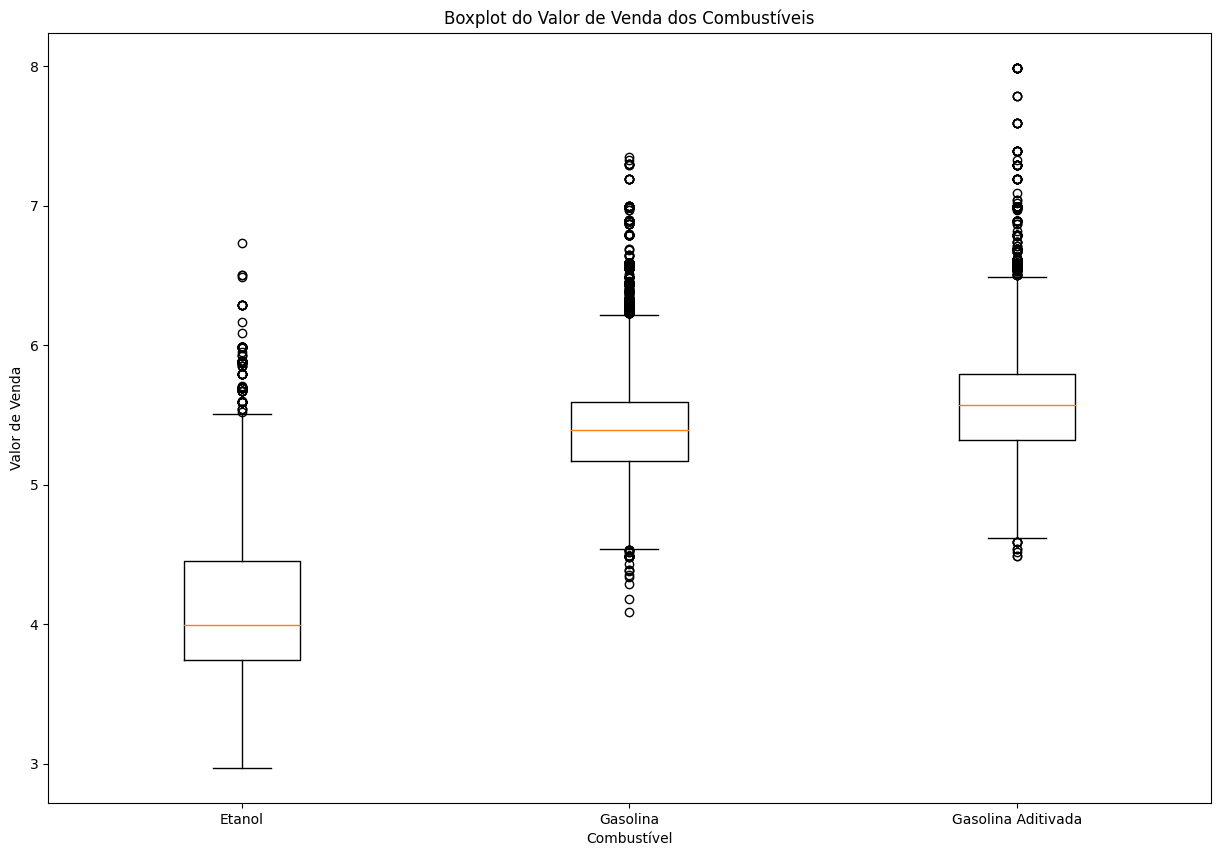

In [81]:
import matplotlib.pyplot as plt

# Dados
dados = [etanol['Valor de Venda'], gasolina['Valor de Venda'], gasolina_adtivada['Valor de Venda']]
nomes_combustiveis = ['Etanol', 'Gasolina', 'Gasolina Aditivada']

# Tamanho da figura
plt.figure(figsize=(15, 10))

# Criação do boxplot com outliers
plt.boxplot(dados, vert=True, labels=nomes_combustiveis, showfliers=True)  # vert=False para um boxplot horizontal

# Título e rótulos
plt.title('Boxplot do Valor de Venda dos Combustíveis')
plt.xlabel('Combustível')
plt.ylabel('Valor de Venda')

# Mostrar o gráfico
plt.show()

- Para confirmar, podemos ver que `99% ` dos valores da gasolina estão proximos ao limite superior do outlier

In [89]:
quantile = gasolina['Valor de Venda'].quantile(.99)
dados ={
    'Combustível': 'Gasolina',
    '99%': quantile,
    'limite superior': limite_outlier_superior_gasolina,
}
df_quantile_limite = pd.DataFrame(dados, index=[0])
df_quantile_limite

,Combustível,99%,limite superior
0,Gasolina,6.59,6.22


# teste

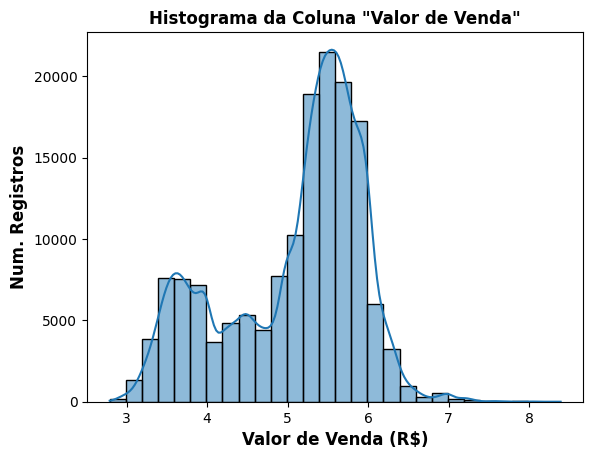

In [20]:
sns.histplot(data=combustiveis['Valor de Venda'], kde=True, binwidth=0.2)

plt.title('Histograma da Coluna "Valor de Venda"', fontsize=12, fontweight='bold')
plt.ylabel('Num. Registros', fontsize=12, fontweight='bold')
plt.xlabel('Valor de Venda (R$)', fontsize=12, fontweight='bold')
plt.show()

Etanol no mês de junho

In [ ]:
combustiveis['Data da Coleta'] = pd.to_datetime(combustiveis['Data da Coleta'], dayfirst=True)

# Filter rows for 'ETANOL' and the month of June
etanol_june = combustiveis[(combustiveis['Produto'] == 'ETANOL') & (combustiveis['Data da Coleta'].dt.month == 6)]

etanol_june.sort_values(by='Data da Coleta')

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,BA,IRECE,IRECE DERIVADOS DE PETROLEO LTDA,09.186.976/0001-75,PRACA AIRTON SENNA,285,TERREO,CENTRO,44900-000,ETANOL,2023-06-01,"4,31",NaN,R$ / litro,VIBRA ENERGIA
863,SE,SP,MIRASSOL,AUTO POSTO MIRAMAX LTDA,10.943.250/0001-19,RUA OSVALDO CRUZ,21-56,NaN,CENTRO,15130-000,ETANOL,2023-06-01,"3,79",NaN,R$ / litro,BRANCA
861,CO,GO,GOIATUBA,AUTO POSTO SCAPIM LTDA. - ME,10.482.745/0001-98,RUA MINAS GERAIS,549,NaN,CENTRO,75600-000,ETANOL,2023-06-01,"3,88",NaN,R$ / litro,BRANCA
858,SE,SP,ITAPOLIS,COOPERCITRUS COOPERATIVA DE PRODUTORES RURAIS,45.236.791/0088-42,AVENIDA CARLOS ADOLFSON,2070,NaN,CENTRO,14900-000,ETANOL,2023-06-01,"3,59",NaN,R$ / litro,IPIRANGA
855,SE,SP,PINDAMONHANGABA,SETE ESTRELAS COMERCIO DE DERIVADOS DE PETROLE...,00.256.893/0030-75,AVENIDA DOUTOR FRANCISCO LESSA JUNIOR,1205,NaN,CHACARA GALEGA,12422-010,ETANOL,2023-06-01,"3,57",NaN,R$ / litro,BRANCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48976,CO,GO,GOIANIA,AUTO POSTO CASTELO LTDA,01.675.138/0001-53,AVENIDA CASTELO BRANCO,3739,NaN,ST RODOVIARIO,74430-130,ETANOL,2023-06-30,"3,94",NaN,R$ / litro,BRANCA
48978,CO,GO,GOIANIA,POSTO DEZ LTDA,01.135.706/0001-23,AVENIDA C12,779,QUADRA124 LOTE 02/03/04,SETOR SUDOESTE,74305-010,ETANOL,2023-06-30,"3,97",NaN,R$ / litro,RAIZEN
48981,SE,MG,OURO PRETO,AUTO POSTO S.F.CENTRO LTDA,04.625.030/0001-44,RUA PADRE ROLIM,284,NaN,CENTRO,35400-000,ETANOL,2023-06-30,"3,69",NaN,R$ / litro,BRANCA
48985,SE,MG,OURO PRETO,AUTO POSTO OURO PRETO LTDA,01.819.646/0001-68,RUA PADRE ROLIM,3000,NaN,SAO CRISTOVAO,35400-000,ETANOL,2023-06-30,"3,69",NaN,R$ / litro,RAIZEN


 GASOLINAS NO MES DE JUNHO

In [ ]:
combustiveis['Data da Coleta'] = pd.to_datetime(combustiveis['Data da Coleta'], dayfirst=True)

# Filter rows for 'ETANOL' and the month of June
gasolina_june = combustiveis[(combustiveis['Produto'].isin(['GASOLINA', 'GASOLINA ADITIVADA'])) & (combustiveis['Data da Coleta'].dt.month == 6)]


gasolina_june.sort_values(by='Data da Coleta')

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
1,NE,BA,IRECE,IRECE DERIVADOS DE PETROLEO LTDA,09.186.976/0001-75,PRACA AIRTON SENNA,285,TERREO,CENTRO,44900-000,GASOLINA,2023-06-01,"5,39",NaN,R$ / litro,VIBRA ENERGIA
830,SE,SP,DIADEMA,POSTO DE SERVICOS 1991 LTDA.,10.308.272/0001-07,AVENIDA ANTONIO PIRANGA,1991,NaN,CANHEMA,09942-000,GASOLINA,2023-06-01,"4,99",NaN,R$ / litro,IPIRANGA
832,SE,SP,DIADEMA,CENTRO AUTOMOTIVO CAHEMA LTDA,10.276.028/0001-00,AVENIDA DOM JOAO VI,296,NaN,TABOAO,09940-150,GASOLINA ADITIVADA,2023-06-01,"4,89",NaN,R$ / litro,BRANCA
833,SE,SP,DIADEMA,CENTRO AUTOMOTIVO CAHEMA LTDA,10.276.028/0001-00,AVENIDA DOM JOAO VI,296,NaN,TABOAO,09940-150,GASOLINA,2023-06-01,"4,79",NaN,R$ / litro,BRANCA
835,SE,SP,SALTO,AUTO POSTO CENTURYCAR LTDA.,10.417.359/0001-12,AVENIDA D. PEDRO II,1153,NaN,CENTRO,13320-241,GASOLINA,2023-06-01,"4,79",NaN,R$ / litro,BRANCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48986,SE,MG,OURO PRETO,AUTO POSTO OURO PRETO LTDA,01.819.646/0001-68,RUA PADRE ROLIM,3000,NaN,SAO CRISTOVAO,35400-000,GASOLINA,2023-06-30,"5,39",NaN,R$ / litro,RAIZEN
48988,SE,MG,OURO PRETO,AUTO POSTO FERRARI LTDA,01.018.631/0001-09,RUA JOAO BATISTA FORTES,34,NaN,PILAR,35400-000,GASOLINA,2023-06-30,"5,49",NaN,R$ / litro,BRANCA
48990,NE,BA,CAMACARI,POSTO CAMAÇARI LTDA.,13.015.680/0001-69,AVENIDA RADIAL A,173/178,NaN,CENTRO,42800-000,GASOLINA ADITIVADA,2023-06-30,"5,64",NaN,R$ / litro,BRANCA
48993,NE,BA,CAMACARI,TREVO DERIVADOS DE PETROLEO LTDA,14.486.153/0003-67,VIA PERIMETRAL,SN,NaN,POLO PETROQUIMICO,42810-400,GASOLINA,2023-06-30,"5,64",NaN,R$ / litro,VIBRA ENERGIA
